# Configurações iniciais

## inicialização

In [1]:
import os
import sys

# (1) Caminho raiz do seu projeto (ajuste se precisar)
PROJECT_DIR = "/content/drive/MyDrive/tcc-modelo/tcc-demand-forecasting"

# (2) Monta o Drive, se ainda não estiver montado
if not os.path.ismount("/content/drive"):
    from google.colab import drive
    drive.mount("/content/drive")

# (3) Garante que o PROJECT_DIR está no sys.path
if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)

print("Repositório ativo em:", PROJECT_DIR)

Mounted at /content/drive
Repositório ativo em: /content/drive/MyDrive/tcc-modelo/tcc-demand-forecasting


## Importações

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.loader import load_dataset
import os

## leitura das bases

In [3]:

cfg_path = os.path.join(PROJECT_DIR, "configs/data.yaml")

dfs = load_dataset(cfg_path, dataset="olist", stage="raw")

for name, df in dfs.items():
    print(f"{name}: {df.info()}")
    print("\n" + "="*50 + "\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
olist_sellers_dataset.csv: None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
product_category_name_translation.csv: None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 9

## visualização dos datasets que serão utilizados

In [4]:
datasets_utilizados = ['olist_order_reviews_dataset.csv','olist_order_items_dataset.csv','olist_orders_dataset.csv','olist_products_dataset.csv', 'olist_customers_dataset.csv']

In [5]:
for name, df in dfs.items():
  if name in datasets_utilizados:
    print(f"{name}: {df.info()}")
    print("\n" + "="*50 + "\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
olist_customers_dataset.csv: None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  3

In [6]:
for df in datasets_utilizados:
  print(df)
  display(dfs[df].head())

olist_order_reviews_dataset.csv


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


olist_order_items_dataset.csv


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


olist_orders_dataset.csv


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


olist_products_dataset.csv


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


olist_customers_dataset.csv


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
# diferença entre a data do pedido e a de aprovação
# diferençã entre a data de previsão e a de entrega
# avaliar prazos e preços de frete por região
# um pedido pode ter mais de um item?


## converte datas para o formato correto

In [8]:
#orders
orders = dfs['olist_orders_dataset.csv']
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Qualidade dos dados

In [46]:
qualidade = []
for name, df in dfs.items():
    nul = df.isna().sum().sort_values(ascending=False)
    dup = int(df.duplicated().sum())
    qualidade.append({'dataset': name, 'duplicados': dup})
    print(f"\n--- {name} --- duplicados: {dup}")
    display(nul[nul>0].to_frame('nulos'))

qualidade_df = pd.DataFrame(qualidade)
display(qualidade_df)


--- olist_sellers_dataset.csv --- duplicados: 0


,nulos



--- product_category_name_translation.csv --- duplicados: 0


,nulos



--- olist_customers_dataset.csv --- duplicados: 0


,nulos



--- olist_products_dataset.csv --- duplicados: 0


,nulos
product_category_name,610
product_description_lenght,610
product_name_lenght,610
product_photos_qty,610
product_weight_g,2
product_height_cm,2
product_length_cm,2
product_width_cm,2



--- olist_orders_dataset.csv --- duplicados: 0


,nulos
order_delivered_customer_date,2965
order_delivered_carrier_date,1783
order_approved_at,160



--- olist_order_reviews_dataset.csv --- duplicados: 0


,nulos
review_comment_title,87656
review_comment_message,58247



--- olist_order_payments_dataset.csv --- duplicados: 0


,nulos



--- olist_order_items_dataset.csv --- duplicados: 0


,nulos



--- olist_geolocation_dataset.csv --- duplicados: 261831


,nulos


,dataset,duplicados
0,olist_sellers_dataset.csv,0
1,product_category_name_translation.csv,0
2,olist_customers_dataset.csv,0
3,olist_products_dataset.csv,0
4,olist_orders_dataset.csv,0
5,olist_order_reviews_dataset.csv,0
6,olist_order_payments_dataset.csv,0
7,olist_order_items_dataset.csv,0
8,olist_geolocation_dataset.csv,261831


# Entendimento da base

## existe diferença significativa entre a data do pedido e a de aprovação do pedido?
- Hipótese: pedidos que demoraram mais a ser processados têm impacto futuro em suas vendas?

In [9]:
# diferença entre a data do pedido e a de aprovação
orders_diff_purchase_aprov = orders['order_approved_at'] - orders['order_purchase_timestamp']
orders_diff_purchase_aprov.describe()

,0
count,99281
mean,0 days 10:25:08.739486910
std,1 days 02:02:16.813098347
min,0 days 00:00:00
25%,0 days 00:12:54
50%,0 days 00:20:36
75%,0 days 14:34:51
max,187 days 21:10:50


(0.0, 48.0)

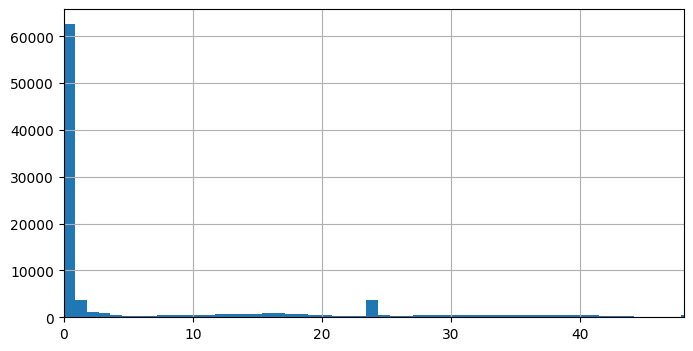

In [10]:
#convertendo para horas e visualizando histograma
orders_diff_purchase_aprov_hours = orders_diff_purchase_aprov.dt.total_seconds() / 3600
orders_diff_purchase_aprov_hours.hist(bins=5000, figsize=(8,4))
plt.xlim(0, 48)


75% das vendas são aprovadas em até 14 horas e 34 minutos, que é um tempo considerável. Irei gerar uma feature baseada nisso para avaliar o impacto nas vendas

## avaliando prazos de entrega
- Objetivo de entender qual a distribuição dos prazos de entrega

In [11]:
# prazo em dias
orders['prazo'] = orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']
orders['prazo'] = orders['prazo'].dt.days

# pegando a coluna de estado do cliente
customer = dfs['olist_customers_dataset.csv']
df_merge = orders.merge(customer[['customer_id', 'customer_state']], on='customer_id', how='left')

# cria uma funcao para gerar a coluna de região baseada na coluna da abreviação dos estados
def get_region(estado):

    estado = estado.upper()

    regioes = {
        "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
        "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
        "Centro-Oeste": ["DF", "GO", "MT", "MS"],
        "Sudeste": ["ES", "MG", "RJ", "SP"],
        "Sul": ["PR", "RS", "SC"]
    }

    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao

    return "estado inválido"

# gera coluna com região
df_merge['regiao'] = df_merge['customer_state'].apply(get_region)

In [12]:
orders['prazo'].describe()

,prazo
count,99441.000000
mean,23.403958
std,8.829562
min,1.000000
25%,18.000000
50%,23.000000
75%,28.000000
max,155.000000


<Axes: >

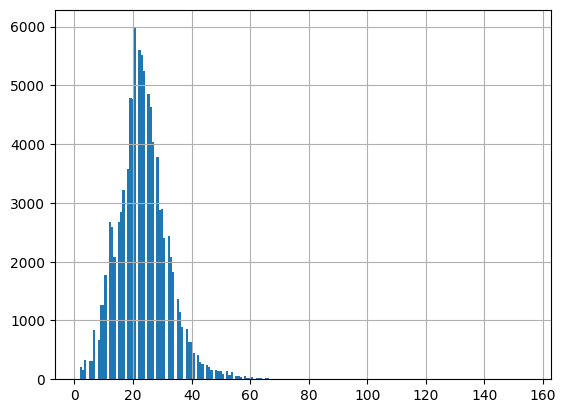

In [13]:
orders['prazo'].hist(bins=200)

Percebe-se que os prazos de entrega dados são muito extensos.
Uma hipótese levantada era se o prazo estimado das entregas poderia ou não ter correlação com as vendas.

<Axes: xlabel='regiao', ylabel='prazo'>

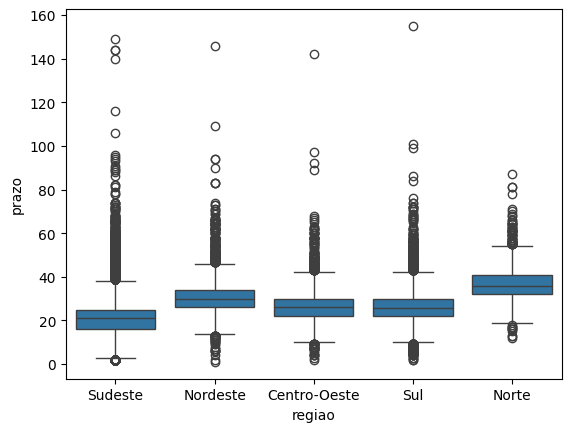

In [14]:
# avaliando o bloxplot dos prazos por região
sns.boxplot(x='regiao', y='prazo', data=df_merge)


no caso da criação de uma feature que avalie o tempo de entrega, cabe olhar separadamente por região. Pois o que é rápido em uma, pode não ser na outra

## avaliação diferença entre a data de previsão e a de entrega
- Hipótese: produtos com entregas mais rápidas têm um maior volume de vendas futuras?

In [15]:
# diferença entre a data de previsão e a de entrega
orders_diff_estimate_delivered = orders['order_estimated_delivery_date'] - orders['order_delivered_carrier_date']
orders_diff_estimate_delivered.describe()

,0
count,97658
mean,20 days 12:29:03.566241373
std,8 days 18:27:11.754178968
min,-100 days +08:15:20
25%,14 days 18:06:34
50%,20 days 06:42:02
75%,25 days 14:02:46.750000
max,192 days 10:25:00


(-20.0, 1100.0)

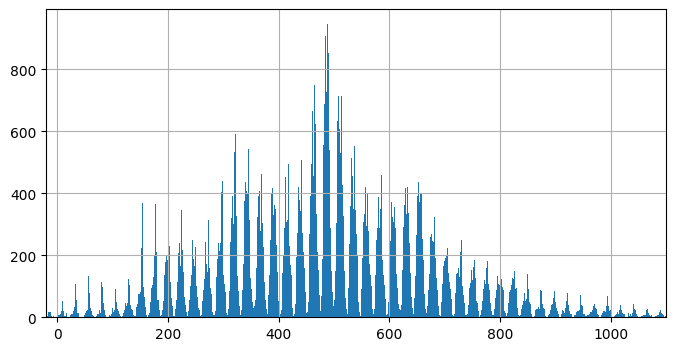

In [16]:
#convertendo para horas e visualizando histograma
orders_diff_estimate_delivered = orders_diff_estimate_delivered.dt.total_seconds() / 3600
orders_diff_estimate_delivered.hist(bins=5000, figsize=(8,4))
plt.xlim(-20, 1100)

In [17]:
#avaliando quantas entregas foram atrasadas
atrasos = orders_diff_estimate_delivered < 0
atrasos.value_counts(normalize=True)

,proportion
False,0.995243
True,0.004757


## avaliando os preços de frete
- Hipótese: produtos com frete mais barato tendem a ter mais vendas futuramente?

In [18]:
# pegando a coluna de valor do frete
items = dfs['olist_order_items_dataset.csv']
df_merge = df_merge.merge(items[['order_id', 'freight_value']], on='order_id', how='left')

In [19]:
df_merge['freight_value'].describe()

,freight_value
count,112650.000000
mean,19.990320
std,15.806405
min,0.000000
25%,13.080000
50%,16.260000
75%,21.150000
max,409.680000


<Axes: xlabel='regiao', ylabel='freight_value'>

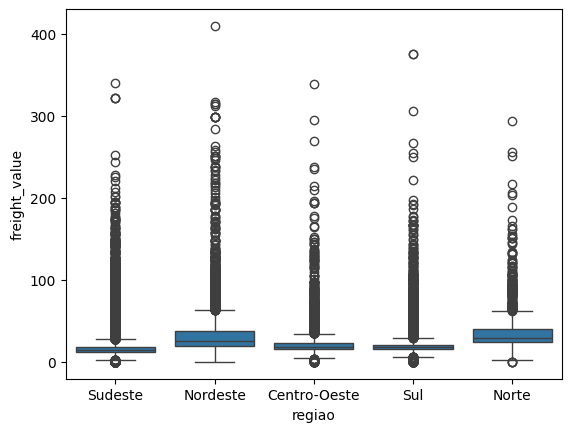

In [20]:
# avaliando o bloxplot dos preços de frete por região
sns.boxplot(x='regiao', y='freight_value', data=df_merge)

## entendendo a relação de itens por pedidos

In [21]:
print(f'qtd linhas df_orders: {len(orders)}, order_id distintos: {orders['order_id'].nunique()}')
print(f'qtd linhas df_items: {len(items)}, order_id distintos: {items['order_id'].nunique()}, order_item_id distintos: {items['order_item_id'].nunique()}')

qtd linhas df_orders: 99441, order_id distintos: 99441
qtd linhas df_items: 112650, order_id distintos: 98666, order_item_id distintos: 21


In [22]:
verifica_items = orders[['order_id']].merge(items[['order_id', 'product_id', 'price']])

In [23]:
# agregando itens distintos por order_id
verifica_items = verifica_items.groupby(['order_id']).agg({'product_id': 'nunique'})
verifica_items.describe()


,product_id
count,98666.000000
mean,1.038098
std,0.226456
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


<Axes: >

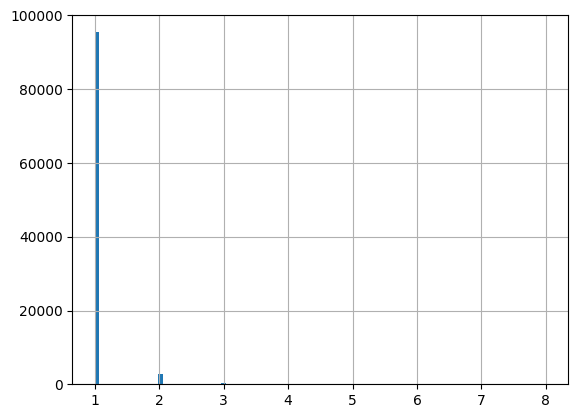

In [24]:
verifica_items['product_id'].hist(bins=100)

In [25]:
# identificando o percentual de pedidos com mais de um item
(verifica_items['product_id'] > 1).sum() / len(verifica_items)*100


np.float64(3.2797518902154743)

A imensa maioria dos pedidos possuem apenas 1 item, apenas 3,27% deles têm mais de 1 item por pedido

## o mesmo item é vendido por diferentes vendedores?


In [26]:
item_sellers = items.groupby(['product_id']).agg({'seller_id': 'nunique'})
item_sellers.describe()

,seller_id
count,32951.000000
mean,1.045431
std,0.260092
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


<Axes: >

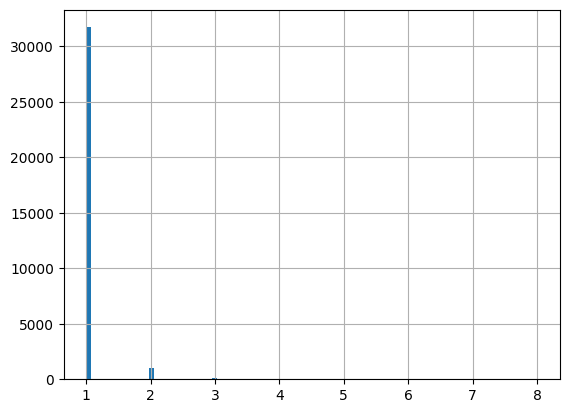

In [27]:
item_sellers['seller_id'].hist(bins=100)

In [28]:
produtos_mais_um_vendedor = (item_sellers['seller_id'] > 1).sum()/len(item_sellers)*100
print(f'percentual de produtos com mais de um vendedor: {produtos_mais_um_vendedor:.2f}%')

percentual de produtos com mais de um vendedor: 3.72%


A imensa maioria dos produtos não se repetem em diferentes vendedores, apenas 3,72% deles aparecem em diferentes vendedores

## quantidade de vendas por product_id
- Produtos com apenas 1 venda limitam a aplicação de variaveis explicatívas, por não ter oscilação ao longo do tempo para se avaliar.

In [29]:
prod_counts = items.groupby("product_id")["order_id"].count().reset_index(name="n_vendas")
prod_counts['n_vendas'].describe()

,n_vendas
count,32951.000000
mean,3.418713
std,10.619709
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,527.000000


array([[<Axes: title={'center': 'n_vendas'}>]], dtype=object)

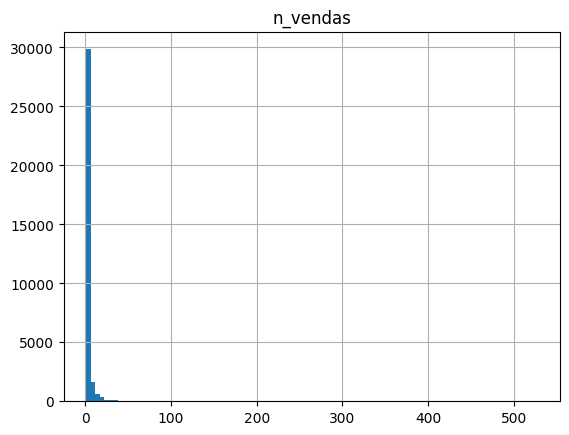

In [30]:
prod_counts.hist(bins=100)

In [31]:
# Ajustar para limitar no máximo em 10 (10 ou mais)
prod_counts["n_vendas_limitado"] = prod_counts["n_vendas"].clip(upper=10)

freq = prod_counts["n_vendas_limitado"].value_counts(normalize=True).sort_index()*100
freq_df = freq.reset_index()
freq_df.columns = ["n_vendas", "frequencia"]
freq_df = freq_df.sort_values("n_vendas", ascending=False).reset_index(drop=True)
freq_df["frequencia_acumulada"] = freq_df["frequencia"].cumsum()
freq_df

,n_vendas,frequencia,frequencia_acumulada
0,10,5.823799,5.823799
1,9,0.877060,6.700859
2,8,1.150193,7.851052
3,7,1.562927,9.413978
4,6,2.233620,11.647598
5,5,3.016600,14.664198
6,4,4.655397,19.319596
7,3,8.045279,27.364875
8,2,17.653485,45.018361
9,1,54.981639,100.000000


É possível observar que 54,98% dos produtos possuem 1 única venda, enquando apenas 27,36% possuem 3 vendas ou mais.

## quantidade de vendas por quantidade de produtos vendidos
- Se a base é composta com produtos que possuem diversas vendas ao longo do tempo, é possível explorar os fatores que causam essa oscilação. Caso os produtos tenham a característica de 1 única venda, as exploração de variáveis explicativas fica limitada.

In [32]:
# trás a visão
# x % das vendas acontecem por produtos vendidos 1 única vez
# x % das vendas acontecem por produtos vendidos 2 vezes ou mais
# ...

# 1) nº de vendas por produto
counts = items.groupby("product_id")["order_id"].count()

# 2) Buckets exatos: 1..9 e 10+ (rotulado como 10)
bucket = counts.clip(upper=10)

# 3) Vendas (soma de n_vendas) por bucket
sales_per_bucket = (
    pd.DataFrame({"n_vendas": counts, "bucket": bucket})
      .groupby("bucket", sort=True)["n_vendas"].sum()
    # garante todos os buckets de 1 a 10
    .reindex(range(1, 11), fill_value=0)
)

# 4) Percentual por bucket (exato) e acumulado de 10→1
total_sales = sales_per_bucket.sum()
pct = (sales_per_bucket / total_sales * 100).round(2)

idx_desc = list(range(10, 0, -1))  # 10,9,...,1
freq_df = pd.DataFrame({
    "n_vendas_min": idx_desc,                # 10 representa 10 ou mais
    "frequencia": [pct[i] for i in idx_desc] # % das vendas do bucket EXATO
})
freq_df["frequencia_acumulada"] = freq_df["frequencia"].cumsum().round(2)

freq_df


,n_vendas_min,frequencia,frequencia_acumulada
0,10,44.55,44.55
1,9,2.31,46.86
2,8,2.69,49.55
3,7,3.20,52.75
4,6,3.92,56.67
5,5,4.41,61.08
6,4,5.45,66.53
7,3,7.06,73.59
8,2,10.33,83.92
9,1,16.08,100.00


Do volume total de vendas, 73,59% acontecem por produtos que foram vendidos 3 vezes ou mais

## relação da avaliação dos usuário e número de vendas dos produtos
- Hipótese: produtos melhores avaliados possuem mais recorrência de vendas?

In [33]:
# veficando o numero de linhas dos datasets que serão utilizados
print(len(items))
reviews = dfs['olist_order_reviews_dataset.csv']
print(len(reviews))

112650
99224


In [34]:
# verficando o numero de linhas do dataset mergeado
items_reviews = items.merge(reviews, on='order_id', how='left')
print(len(items_reviews))
items_reviews.drop_duplicates()
print(len(items_reviews))

113314
113314


In [35]:
# entender por que aumenta o numero de linhas
verifica_reviews = items_reviews.groupby(['order_id', 'product_id'])['review_id'].nunique()
verifica_reviews.reset_index().groupby('review_id').nunique()

# percebe-se que alguns casos possuem mais de uma avaliação, o que faz aumentar o

,order_id,product_id
review_id,,
0,749,725
1,97373,32668
2,540,497
3,4,6


In [36]:
# verificando os casos com mais de uma avaliação
id_vefificar = verifica_reviews[verifica_reviews == 3].reset_index()['order_id'].iloc[0]
items_reviews[items_reviews['order_id'] == id_vefificar]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1652,03c939fd7fd3b38f8485a0f95798f1f6,1,ab5da1daa941470d14366f4e76a99dd2,d91fb3b7d041e83b64a00a3edfb37e4f,2018-03-02 09:35:46,26.0,16.11,b04ed893318da5b863e878cd3d0511df,3.0,NaN,Um ponto negativo que achei foi a cobrança de ...,2018-03-20 00:00:00,2018-03-21 02:28:23
1653,03c939fd7fd3b38f8485a0f95798f1f6,1,ab5da1daa941470d14366f4e76a99dd2,d91fb3b7d041e83b64a00a3edfb37e4f,2018-03-02 09:35:46,26.0,16.11,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,4.0,NaN,NaN,2018-03-29 00:00:00,2018-03-30 00:29:09
1654,03c939fd7fd3b38f8485a0f95798f1f6,1,ab5da1daa941470d14366f4e76a99dd2,d91fb3b7d041e83b64a00a3edfb37e4f,2018-03-02 09:35:46,26.0,16.11,405eb2ea45e1dbe2662541ae5b47e2aa,3.0,NaN,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06 00:00:00,2018-03-06 19:50:32


In [37]:
# avaliar a média das avaliações para cada faixa de n_vendas_min

# Média do review_score por faixa de n_vendas_min
# juntar com items_reviews (que tem 'product_id' e 'review_score')
# e aplicar a mesma bucketização
items_reviews = items_reviews.copy()
items_reviews["bucket"] = items_reviews["product_id"].map(bucket)

# calcular média de review_score por bucket
mean_reviews = (
    items_reviews.groupby("bucket")["review_score"]
    .mean()
    .reindex(range(1, 11))
    .round(2)
)

# adicionar a coluna na tabela final
freq_df["media_review_score"] = [mean_reviews.get(i, np.nan) for i in idx_desc]

freq_df

,n_vendas_min,frequencia,frequencia_acumulada,media_review_score
0,10,44.55,44.55,4.03
1,9,2.31,46.86,3.93
2,8,2.69,49.55,3.99
3,7,3.20,52.75,4.03
4,6,3.92,56.67,4.04
5,5,4.41,61.08,4.05
6,4,5.45,66.53,4.02
7,3,7.06,73.59,4.03
8,2,10.33,83.92,4.03
9,1,16.08,100.00,4.06


não há relação aparentes entre o numero de vendas e suas avaliações

## os produtos possuem variação de preço considerável ao longo do tempo?
- Hipótese: a variação de preços impacta nas vendas futuras?

In [38]:
# filtrar produtos que tiveram 3 vendas ou mais
# ordenar pela data de venda
# calcular a variação percentual em relação à data mais recente

produtos_3_vendas =  prod_counts[prod_counts['n_vendas'] >= 3]['product_id']
orders_items = orders.merge(items, on='order_id', how='left')
variacao_precos = orders_items[orders_items['product_id'].isin(produtos_3_vendas)].sort_values('order_purchase_timestamp')
variacao_precos['price_pct_change'] = variacao_precos.groupby('product_id')['price'].pct_change() * 100

In [39]:
# visualizando um exemplo em que ocorre variação
variacao_precos[variacao_precos['product_id'] == 'fffdb2d0ec8d6a61f0a0a0db3f25b441']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,prazo,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_pct_change
78220,a8159270bc9cf7d54450e079ba6b7232,839b3007f7e5aee8f8eb130c8fa51c29,delivered,2018-04-01 11:58:04,2018-04-03 05:35:27,2018-04-03 19:47:10,2018-04-20 20:56:36,2018-04-20,18,1.0,fffdb2d0ec8d6a61f0a0a0db3f25b441,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23,NaN
14371,beaf95465b542dea76df78b2fb86a97a,d14930bf3da4e0ba5a02cc8d6ac80f6e,delivered,2018-04-19 10:12:12,2018-04-19 10:34:35,2018-04-19 19:26:57,2018-04-25 17:58:54,2018-05-15,25,1.0,fffdb2d0ec8d6a61f0a0a0db3f25b441,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23,16.672224
18415,dd38c566a34ff9deb93ff05d7bd6d0aa,35e8f2cff4eeed925cfa42f6731a4425,delivered,2018-05-01 17:31:41,2018-05-01 17:53:01,2018-05-02 15:04:00,2018-05-03 18:32:48,2018-05-15,13,1.0,fffdb2d0ec8d6a61f0a0a0db3f25b441,9f505651f4a6abe901a56cdc21508025,2018-05-07 17:53:01,34.99,7.39,0.000000
51392,2878b4e373a9556df9aa1708a4e5c3c8,a050cd2edce49d430222e6019fa50fd2,delivered,2018-08-07 16:07:57,2018-08-07 16:55:38,2018-08-09 07:06:00,2018-08-09 18:54:34,2018-08-10,2,1.0,fffdb2d0ec8d6a61f0a0a0db3f25b441,9f505651f4a6abe901a56cdc21508025,2018-08-09 16:55:38,34.99,7.51,0.000000
3756,d6c1ed12e8eeaa15e9d5c83c79598f85,550ccac77275f9cdec4b6cd97ac118d0,delivered,2018-08-10 17:15:07,2018-08-10 17:25:18,2018-08-13 15:14:00,2018-08-14 20:50:53,2018-08-15,4,1.0,fffdb2d0ec8d6a61f0a0a0db3f25b441,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51,0.000000


In [40]:
# distribuição da variação
variacao_precos = variacao_precos.dropna(subset=['price_pct_change'])
variacao_precos['price_pct_change'].describe()

,price_pct_change
count,73882.000000
mean,0.377870
std,7.676405
min,-78.723404
25%,0.000000
50%,0.000000
75%,0.000000
max,900.000000


<Axes: >

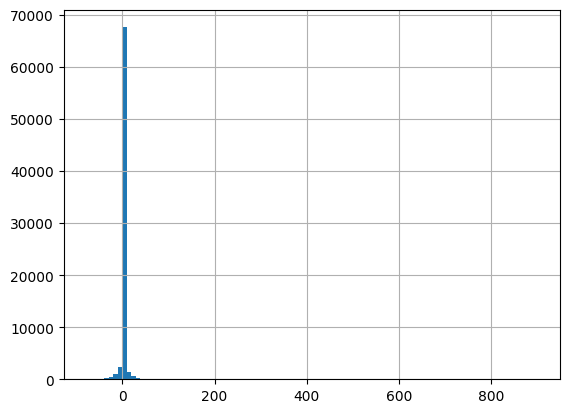

In [41]:
variacao_precos['price_pct_change'].hist(bins=100)

In [42]:
# percentual de casos com variacao diferente de 0
(variacao_precos['price_pct_change'] != 0).sum() / len(variacao_precos) * 100

np.float64(12.017812187000894)

Dentre os produtos que têm 3 vendas ou mais, 12% deles possuem variação de preço, então é possível explorar essa variável

# Visualização dos dados gerais

## Vendas e itens por categoria

In [43]:
# order_id, item_id e categoria
df_items_products = items.merge(dfs['olist_products_dataset.csv'], on='product_id', how='left')

In [44]:
# gerando tabela com vendas e produtos por categoria
tabela_vendas_itens_categoria = df_items_products.groupby('product_category_name')\
.agg({'order_id': 'count', 'product_id': 'nunique'})\
.sort_values('order_id', ascending=False)\
.reset_index()

# lista com as 20 categorias mais vendidas
top20_categorias = tabela_vendas_itens_categoria['product_category_name'].loc[:19].to_list()

# mantendo o nome dos 20 primeiros produtos e atribuindo 'outros' para os demais
tabela_vendas_itens_categoria['product_category_name'] = tabela_vendas_itens_categoria['product_category_name'].apply(lambda x: x if x in top20_categorias else 'outros')

# reagrupando agora com a nova coluna
tabela_vendas_itens_categoria = tabela_vendas_itens_categoria.groupby('product_category_name')\
.agg({'order_id': 'sum', 'product_id': 'sum'})\
.sort_values('order_id', ascending=False)\
.reset_index()

# gerando coluna com média de vendas por produto
tabela_vendas_itens_categoria['vendas_por_item'] = (tabela_vendas_itens_categoria['order_id'] / tabela_vendas_itens_categoria['product_id']).round(2)

# renomeia as colunas
tabela_vendas_itens_categoria.columns = ['categoria', 'vendas', 'itens', 'vendas_por_item']

# coluna com o  percentual geral de vendas
tabela_vendas_itens_categoria['percentual_vendas'] = ((tabela_vendas_itens_categoria['vendas'] / tabela_vendas_itens_categoria['vendas'].sum()) * 100).round(2).astype(str) + "%"
tabela_vendas_itens_categoria




,categoria,vendas,itens,vendas_por_item,percentual_vendas
0,outros,12891,4707,2.74,11.61%
1,cama_mesa_banho,11115,3029,3.67,10.01%
2,beleza_saude,9670,2444,3.96,8.71%
3,esporte_lazer,8641,2867,3.01,7.78%
4,moveis_decoracao,8334,2657,3.14,7.5%
5,informatica_acessorios,7827,1639,4.78,7.05%
6,utilidades_domesticas,6964,2335,2.98,6.27%
7,relogios_presentes,5991,1329,4.51,5.4%
8,telefonia,4545,1134,4.01,4.09%
9,ferramentas_jardim,4347,753,5.77,3.91%


## Volumetria ao longo do tempo com agregação semanal

<Axes: >

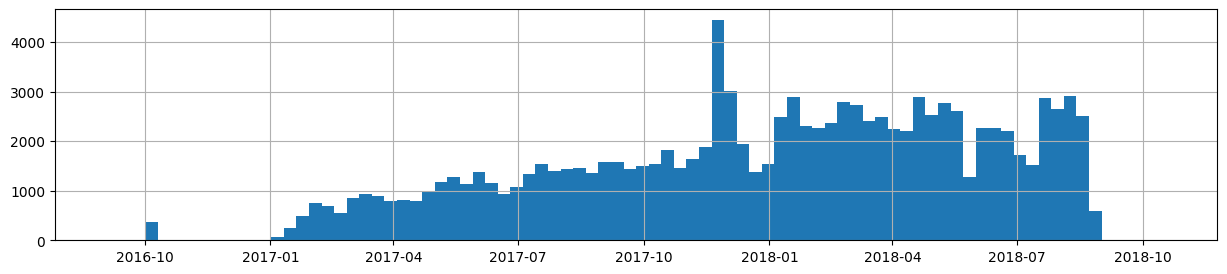

In [45]:
# gerando tabela com vendas por semanas
pd.to_datetime(orders_items.order_purchase_timestamp).dt.date.hist(bins=593//7,figsize=(15,3))